### Name: Humberto Diaz
### Date: June 4th, 2025

## Task 1 - Creating Your Data Mart From The Following Data Sources

- Source1: Flat file source: Combine the employee data (employee.csv, employee.json, employee.csv)
- Source2: api source: https://jsonplaceholder.typicode.com/posts
- Source3: database source - Use the account table in your snowflake in one of the previous exercise, read it in your Jupyter and pull out only ID,name and sales_rep_Id
- Create a New schema (ETL_ASSIGNEMENT_Q1) under your database. Load tables in the data mart - 3 tables in total


### 1. Import required libraries


In [1]:
import pandas as pd
import requests
import json
import xml.etree.ElementTree as ET
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

/Users/eleazar/Documents/Projects/DAMDS/venv/lib/python3.13/site-packages/snowflake/connector/options.py:104: UserWarning: You have an incompatible version of 'pyarrow' installed (20.0.0), please install a version that adheres to: 'pyarrow<19.0.0; extra == "pandas"'
  warn_incompatible_dep(


### 2. Connect to Snowflake

In [2]:
print("Connecting to Snowflake...")
conn = snowflake.connector.connect(
    user='HUMBERTOD',
    password='Danielaindarte11',
    account='JQBVMSD-EV26583',
    warehouse='COMPUTE_WH',
    database='TEST'
)
cur = conn.cursor()
print("Connection established.\n")

Connecting to Snowflake...
Connection established.



### 3. Load data from CSV, JSON, and XML

In [3]:
print("Loading data from CSV, JSON, and XML files...")
csv_data = pd.read_csv('/Users/eleazar/Documents/Projects/DAMDS/day2/Question1/employees.csv')
with open('/Users/eleazar/Documents/Projects/DAMDS/day2/Question1/employees.json') as f:
    json_data = json.load(f)
json_df = pd.DataFrame(json_data)
tree = ET.parse('/Users/eleazar/Documents/Projects/DAMDS/day2/Question1/employees.xml')
root = tree.getroot()
xml_data = []
for employee in root.findall('employee'):
    xml_data.append({
        'id': int(employee.find('id').text),
        'name': employee.find('name').text,
        'department': employee.find('department').text,
        'salary': int(employee.find('salary').text)
    })
xml_df = pd.DataFrame(xml_data)
print("Files loaded successfully.\n")

Loading data from CSV, JSON, and XML files...
Files loaded successfully.



### 4. Combine the three data sources

In [4]:
print("Combining and cleaning employee data...")
csv_data.columns = csv_data.columns.str.upper()
json_df.columns = json_df.columns.str.upper()
xml_df.columns = xml_df.columns.str.upper()
employee_df = pd.concat([csv_data, json_df, xml_df], ignore_index=True)
employee_df = employee_df.drop_duplicates(subset='ID')
print(f"Combined employee data shape: {employee_df.shape}\n")

Combining and cleaning employee data...
Combined employee data shape: (3, 4)



In [5]:
employee_df.head()

,ID,NAME,DEPARTMENT,SALARY
0,1,Alice Johnson,Finance,50091
1,2,Alice Johnson,IT,57010
2,3,Alice Johnson,Finance,78148


### 5. Load API data


In [6]:
print("Fetching data from API...")
url = 'https://jsonplaceholder.typicode.com/posts'
response = requests.get(url)
posts_data = response.json()
posts_df = pd.DataFrame(posts_data)[['userId', 'id', 'title', 'body']]
posts_df.columns = ['USERID', 'ID', 'TITLE', 'BODY']
print(f"API data loaded. Number of posts: {len(posts_df)}\n")

Fetching data from API...
API data loaded. Number of posts: 100



In [7]:
posts_df.head()

,USERID,ID,TITLE,BODY
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


### 6. Load data from Snowflake table

In [8]:
print("Reading account data from Snowflake table...")
cur.execute("SELECT ID, NAME, SALES_REP_ID FROM TEST.DAY2.ACCOUNTS")
rows = cur.fetchall()
account_df = pd.DataFrame(rows, columns=['ID', 'NAME', 'SALES_REP_ID'])
print(f"Account data loaded. Number of records: {len(account_df)}\n")

Reading account data from Snowflake table...
Account data loaded. Number of records: 351



In [9]:
account_df.head()

,ID,NAME,SALES_REP_ID
0,1001,Walmart,321500
1,1011,Exxon Mobil,321510
2,1021,Apple,321520
3,1031,Berkshire Hathaway,321530
4,1041,McKesson,321540


### 7. Create schema and tables in Snowflake

In [10]:
print("Creating schema and tables in Snowflake...")
cur.execute("CREATE SCHEMA IF NOT EXISTS TEST.ETL_ASSIGNEMENT_Q1")
cur.execute("""
    CREATE OR REPLACE TABLE TEST.ETL_ASSIGNEMENT_Q1.EMPLOYEES (
        ID INT, NAME STRING, DEPARTMENT STRING, SALARY INT
    )
""")
cur.execute("""
    CREATE OR REPLACE TABLE TEST.ETL_ASSIGNEMENT_Q1.POSTS (
        USERID INT, ID INT, TITLE STRING, BODY STRING
    )
""")
cur.execute("""
    CREATE OR REPLACE TABLE TEST.ETL_ASSIGNEMENT_Q1.ACCOUNTS (
        ID INT, NAME STRING, SALES_REP_ID INT
    )
""")
print("Schema and tables created.\n")

Creating schema and tables in Snowflake...
Schema and tables created.



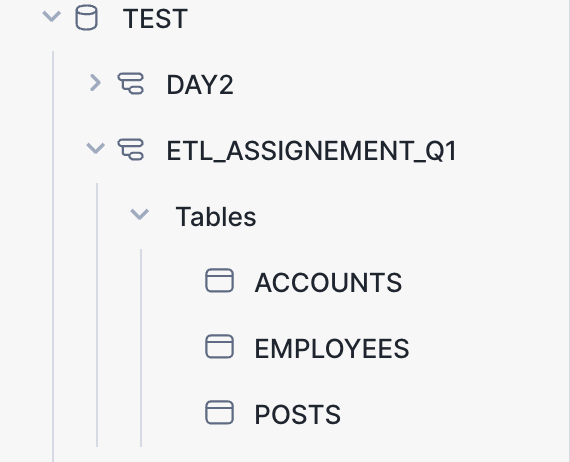

In [11]:
from IPython.display import Image

Image(filename='/Users/eleazar/Desktop/Screenshots/2025-06-03 at 12.59.00.png', width=400, height=400)

### 8. Upload data to Snowflake tables

In [12]:
print("Uploading data to Snowflake tables...")
write_pandas(conn, employee_df, 'EMPLOYEES', schema='ETL_ASSIGNEMENT_Q1', database='TEST')
write_pandas(conn, posts_df, 'POSTS', schema='ETL_ASSIGNEMENT_Q1', database='TEST')
write_pandas(conn, account_df, 'ACCOUNTS', schema='ETL_ASSIGNEMENT_Q1', database='TEST')
print("Data uploaded successfully.\n")

Uploading data to Snowflake tables...


/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_87728/2262015583.py:2: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.base.Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep index as column(s)
  write_pandas(conn, employee_df, 'EMPLOYEES', schema='ETL_ASSIGNEMENT_Q1', database='TEST')


Data uploaded successfully.



**See the pictures in Snowflake:**

Accounts:

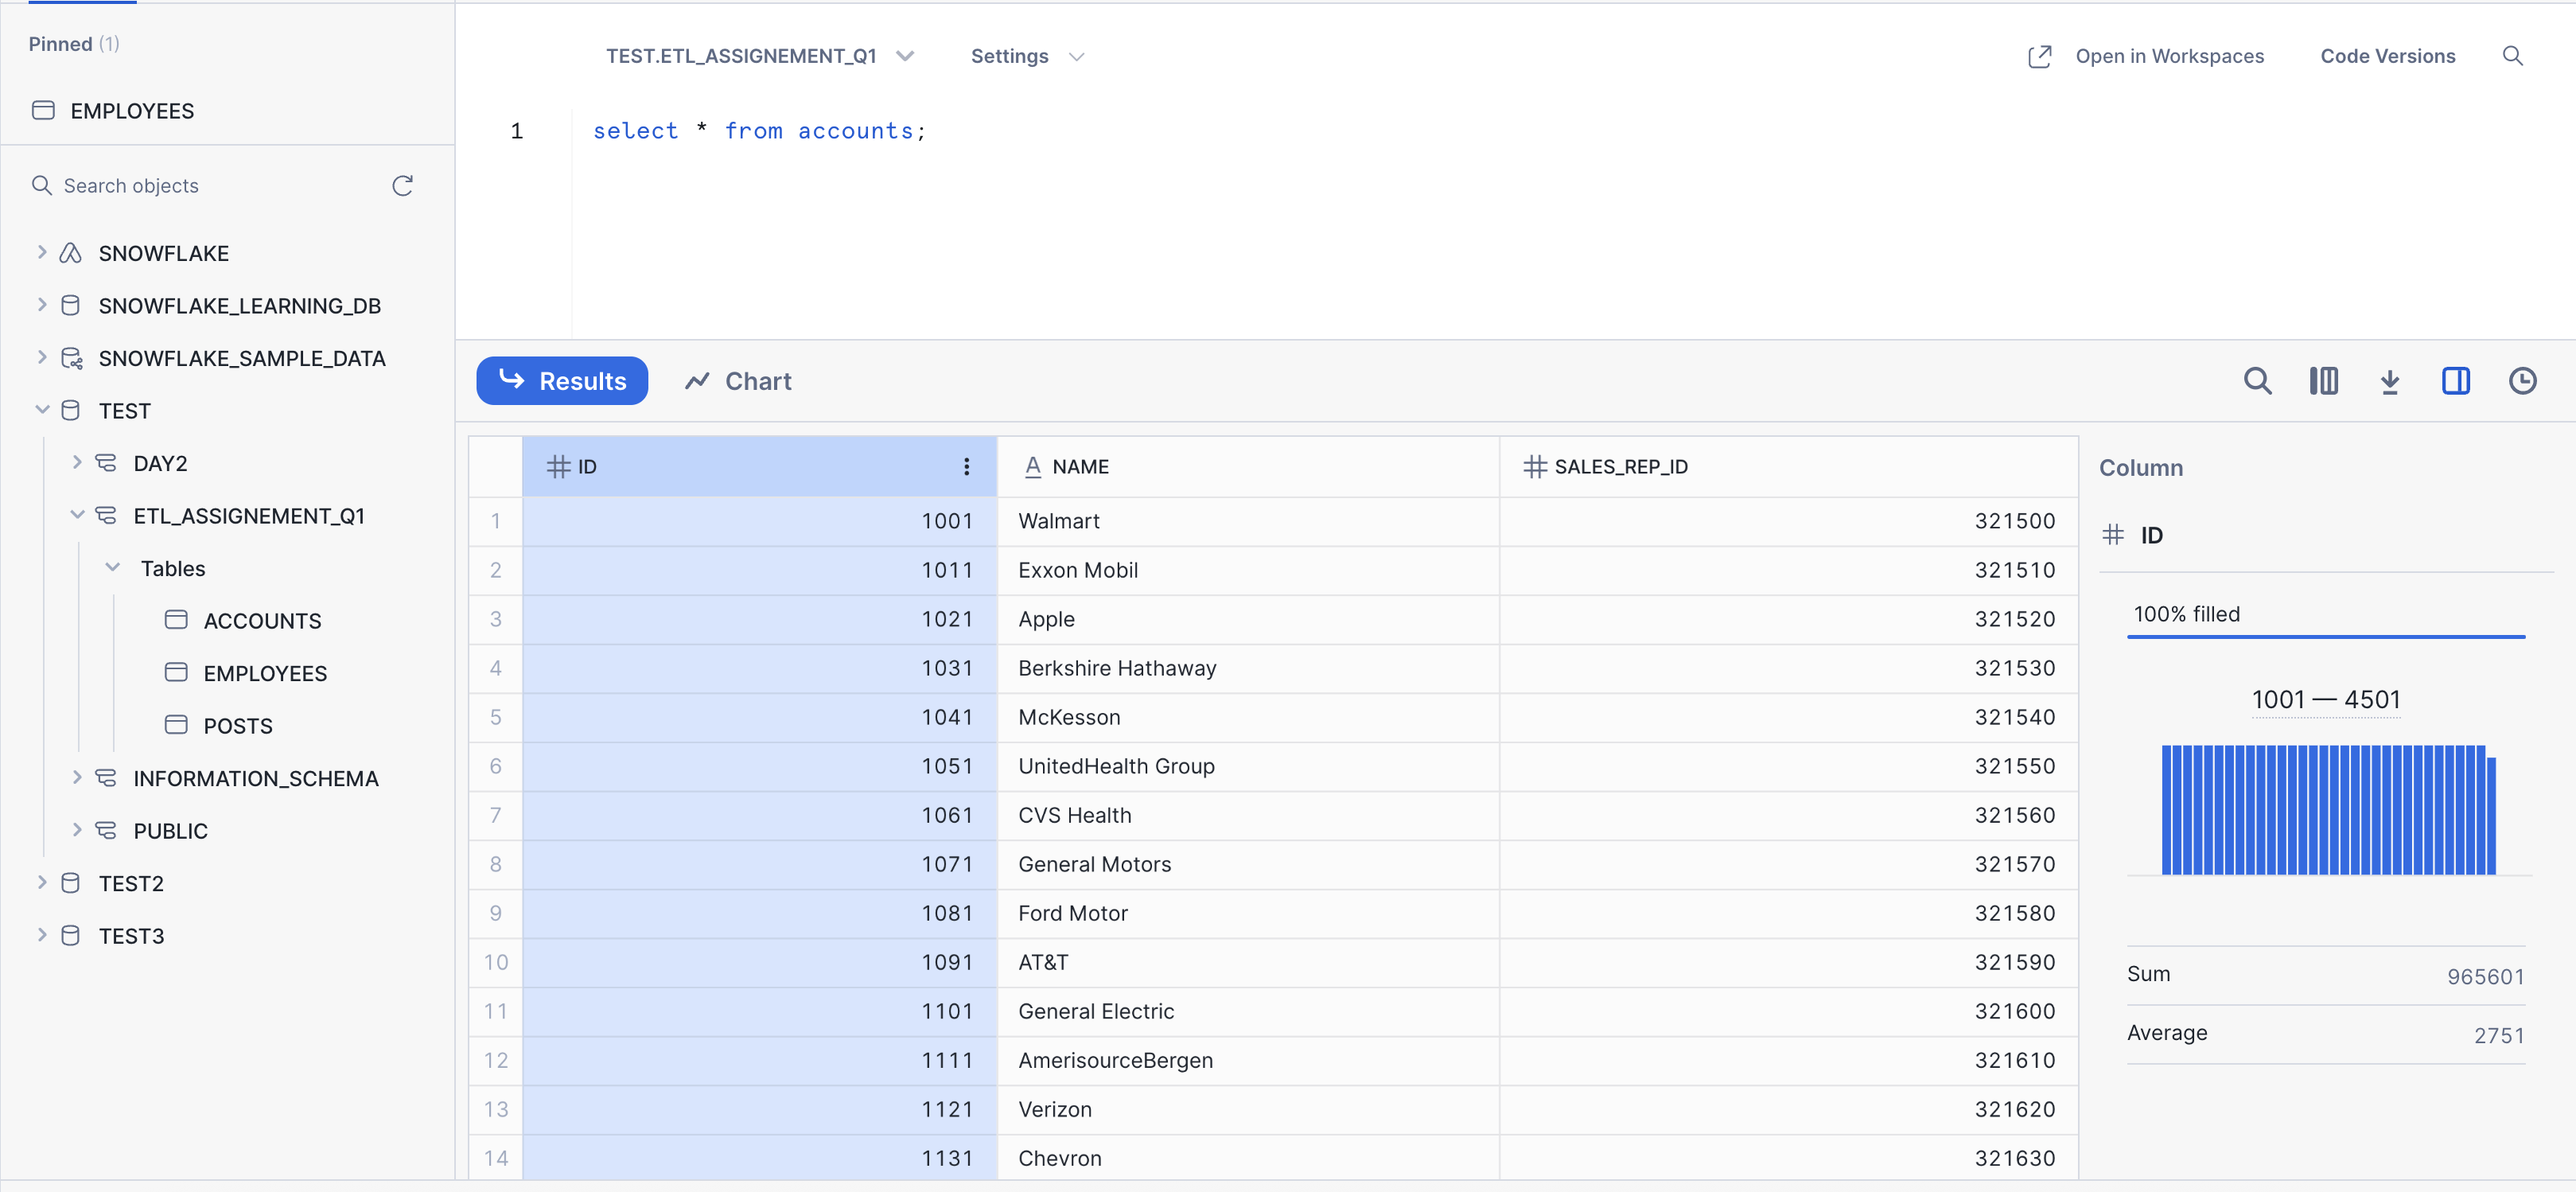

In [28]:
Image(filename="/Users/eleazar/Desktop/Screenshots/2025-06-03 at 19.13.00.png", width=700)

Employees:

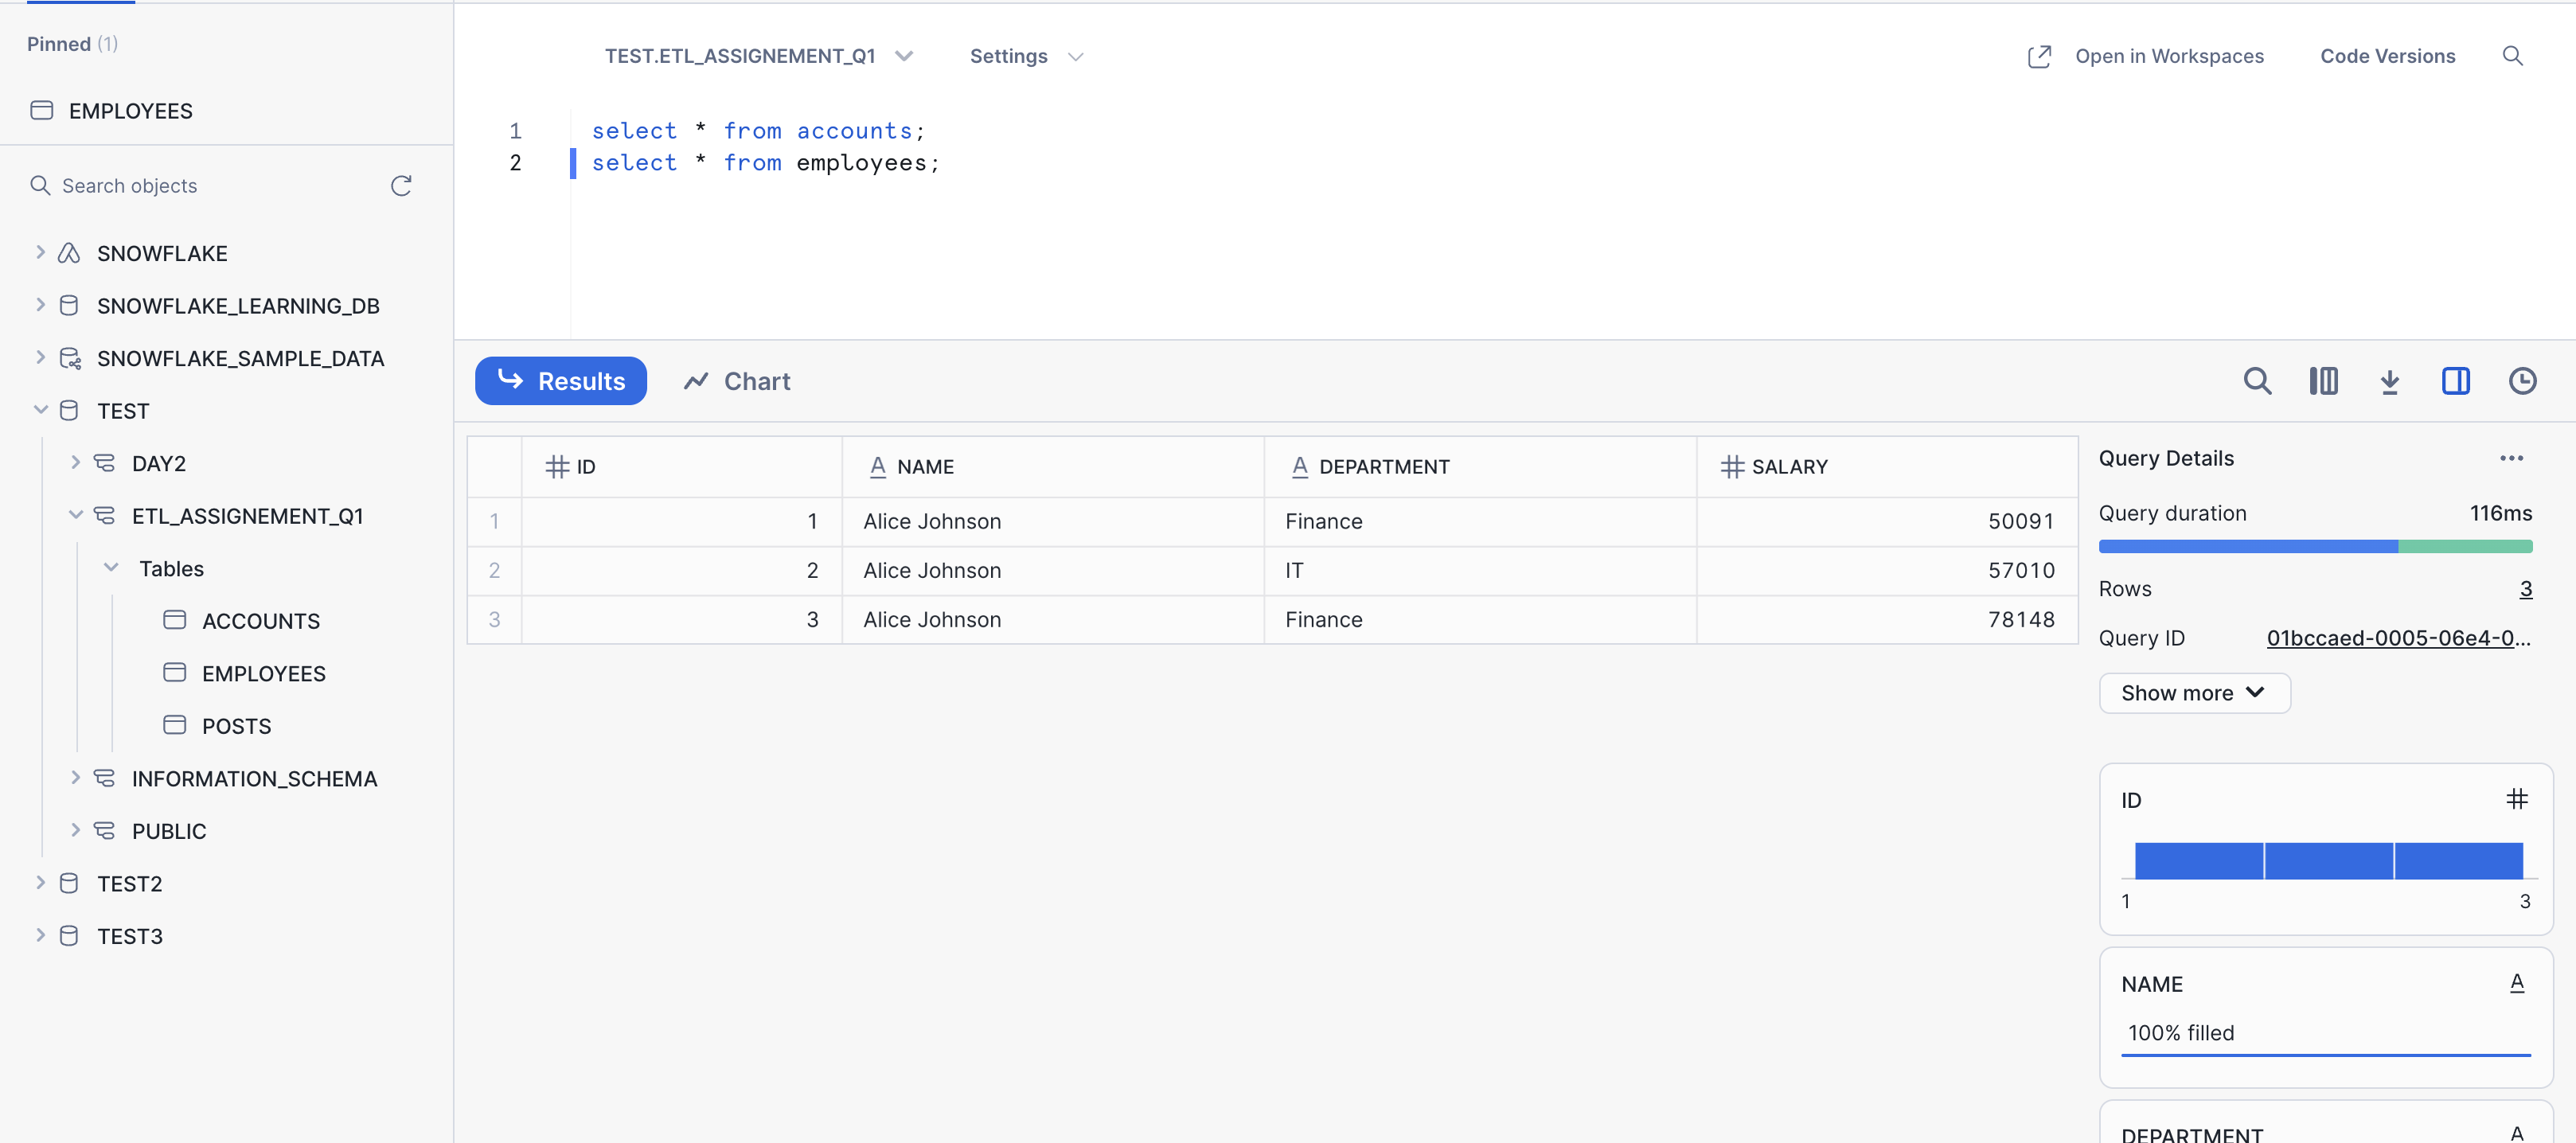

In [32]:
Image(filename='/Users/eleazar/Desktop/Screenshots/2025-06-03 at 19.14.00.png', width=700)

Posts:

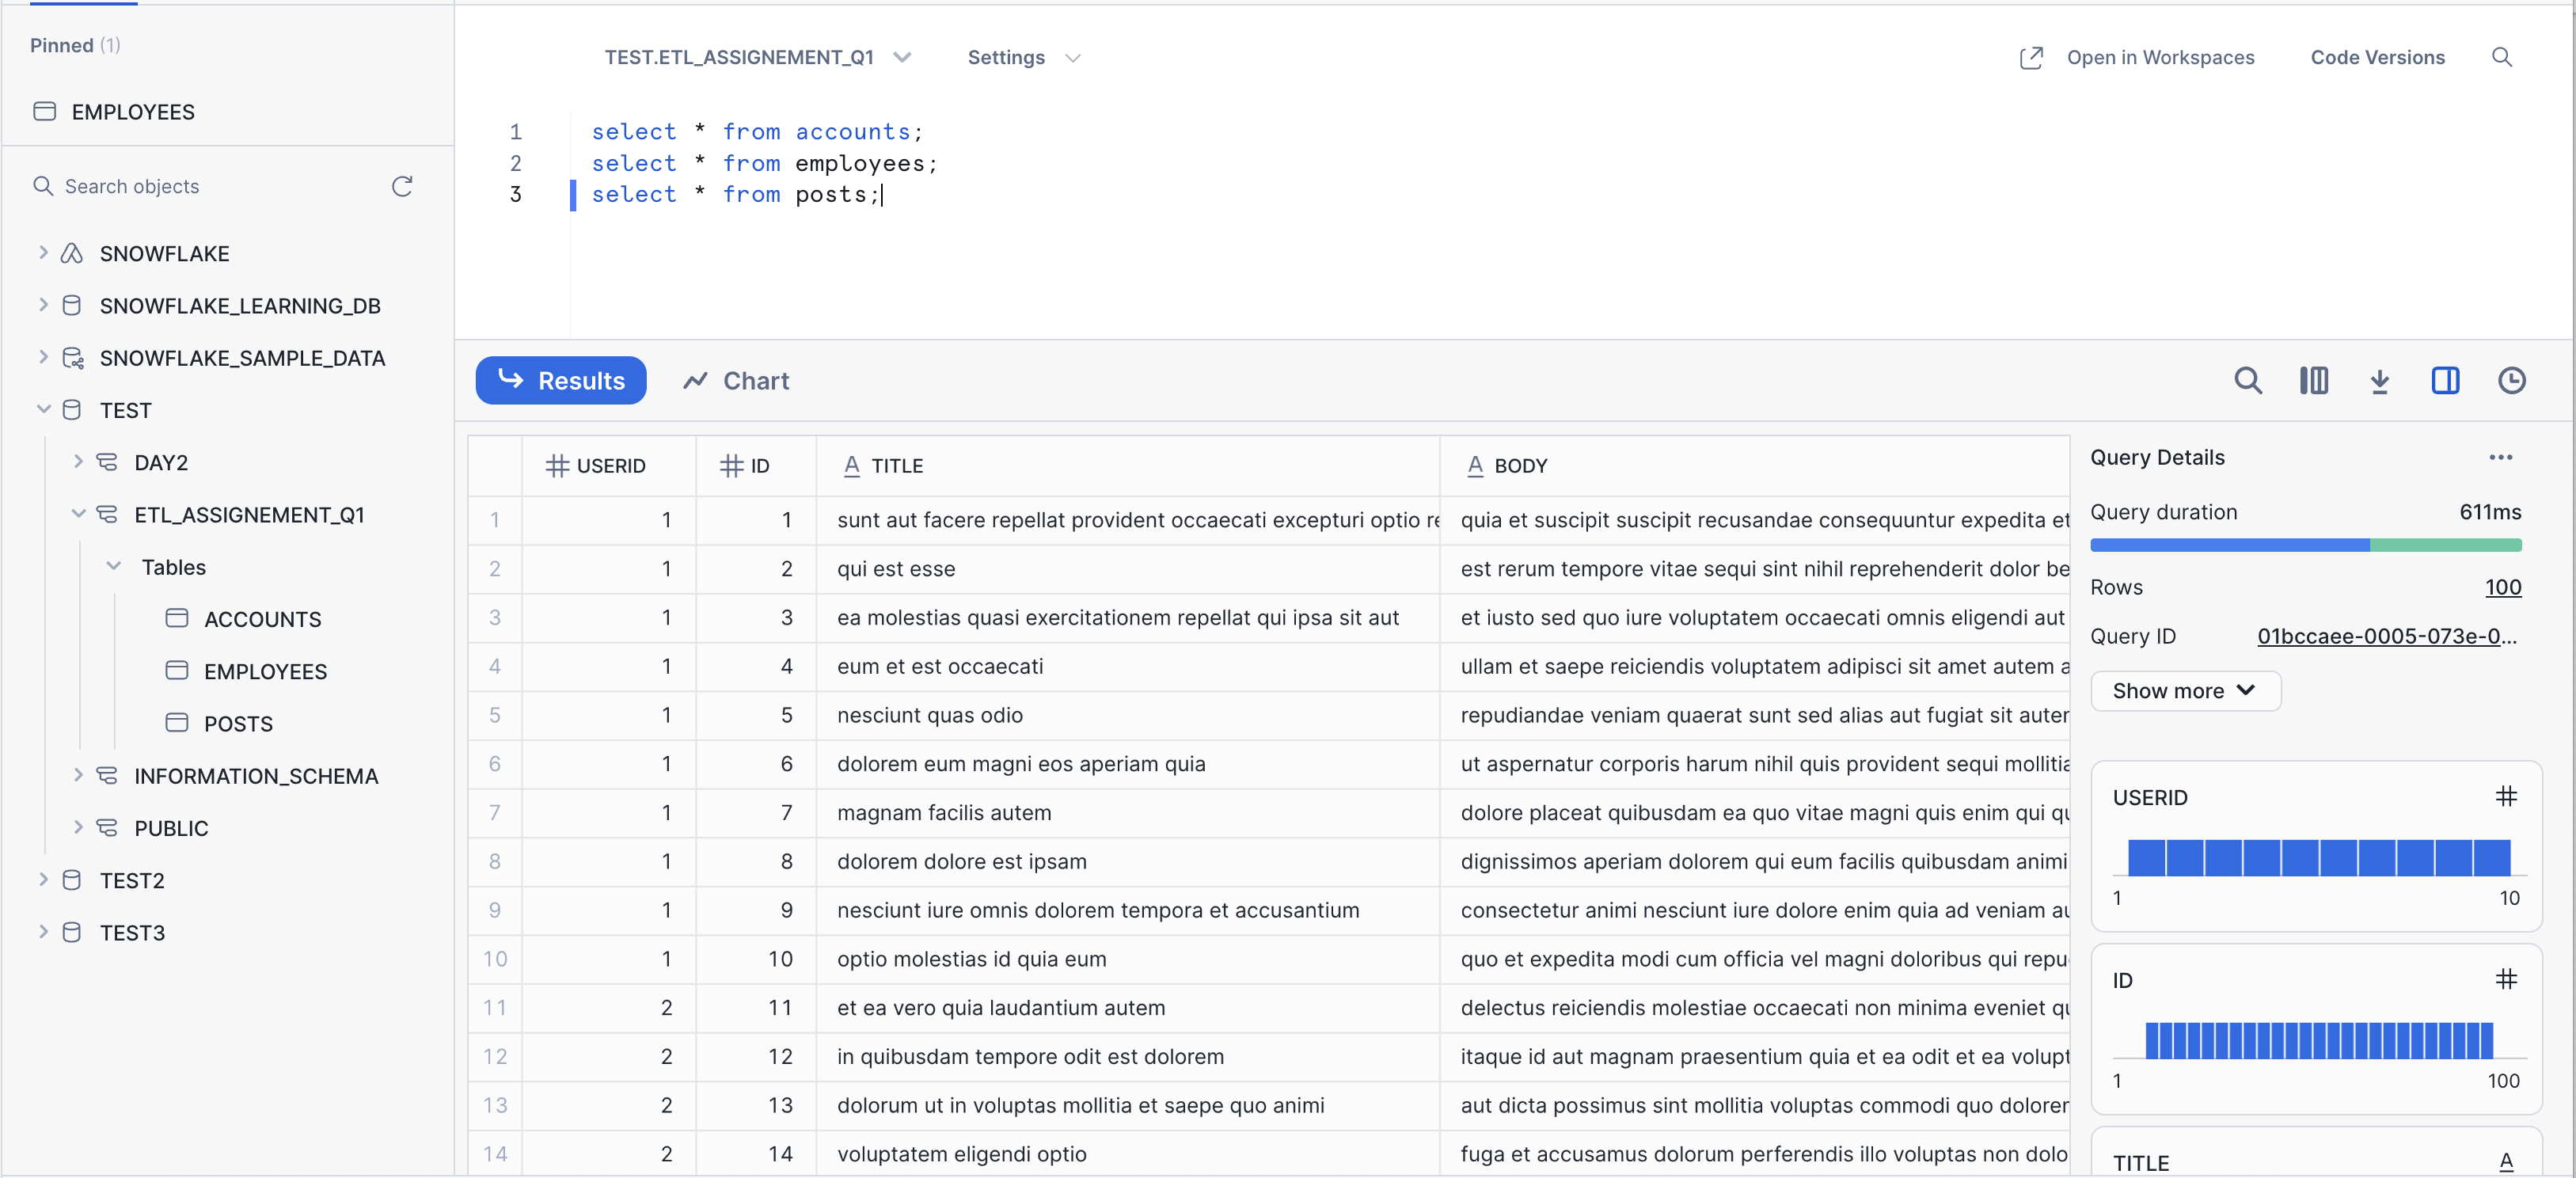

In [34]:
Image(filename='/Users/eleazar/Desktop/Screenshots/2025-06-03 at 19.14.00-2.png', width=700)

### 9. List all tables in the schema

In [13]:
print("Listing all tables in the schema ETL_ASSIGNEMENT_Q1...")
cur.execute("SHOW TABLES IN SCHEMA TEST.ETL_ASSIGNEMENT_Q1")
tables = cur.fetchall()
for table in tables:
    print(f"- {table[1]}")

print("\n")

Listing all tables in the schema ETL_ASSIGNEMENT_Q1...
- ACCOUNTS
- EMPLOYEES
- POSTS




### 10. Display content of each table

In [14]:
print("EMPLOYEES table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNEMENT_Q1.EMPLOYEES LIMIT 5")
print(cur.fetchall(), "\n")

print("POSTS table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNEMENT_Q1.POSTS LIMIT 5")
print(cur.fetchall(), "\n")

print("ACCOUNTS table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNEMENT_Q1.ACCOUNTS LIMIT 5")
print(cur.fetchall(), "\n")

EMPLOYEES table contents:
[(1, 'Alice Johnson', 'Finance', 50091), (2, 'Alice Johnson', 'IT', 57010), (3, 'Alice Johnson', 'Finance', 78148)] 

POSTS table contents:
[(1, 1, 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'), (1, 2, 'qui est esse', 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'), (1, 3, 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'), (1, 4, 'eum et est occaecati', 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda

In [15]:
print("\nVerifying Loaded Data")
try:
    for table, cols in [('EMPLOYEES', ['ID', 'NAME', 'DEPARTMENT', 'SALARY']),
                        ('POSTS', ['USERID', 'ID', 'TITLE', 'BODY']),
                        ('ACCOUNTS', ['ID', 'NAME', 'SALES_REP_ID'])]:
        print(f"Fetching {table} table data...")
        cur.execute(f"SELECT * FROM TEST.ETL_ASSIGNEMENT_Q1.{table}")
        print(f"{table} Table:")
        print(pd.DataFrame(cur.fetchall(), columns=cols))
except Exception as e:
    print(f"Error verifying data: {str(e)}")



Verifying Loaded Data
Fetching EMPLOYEES table data...
EMPLOYEES Table:
   ID           NAME DEPARTMENT  SALARY
0   1  Alice Johnson    Finance   50091
1   2  Alice Johnson         IT   57010
2   3  Alice Johnson    Finance   78148
Fetching POSTS table data...
POSTS Table:
    USERID   ID                                              TITLE  \
0        1    1  sunt aut facere repellat provident occaecati e...   
1        1    2                                       qui est esse   
2        1    3  ea molestias quasi exercitationem repellat qui...   
3        1    4                               eum et est occaecati   
4        1    5                                 nesciunt quas odio   
..     ...  ...                                                ...   
95      10   96  quaerat velit veniam amet cupiditate aut numqu...   
96      10   97         quas fugiat ut perspiciatis vero provident   
97      10   98                        laboriosam dolor voluptates   
98      10   99  temporib

### 11. Close connection

In [16]:
cur.close()
conn.close()
print("Snowflake connection closed.")

Snowflake connection closed.
